In [ ]:
!pip install photutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd

In [ ]:
b1 = '/content/drive/MyDrive/data citra/em em/m6-blue_aligned.fit'
v1 = '/content/drive/MyDrive/data citra/em em/m6-visual_aligned.fit'
b2 = '/content/drive/MyDrive/data citra/em em/m7-blue_aligned.fit'
v2 = '/content/drive/MyDrive/data citra/em em/m7-visual_aligned.fit'

In [ ]:
m6_b = fits.open(b1)
m6_v = fits.open(v1)
m7_b = fits.open(b2)
m7_v = fits.open(v2)

In [ ]:
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(m6_b[0].data, sigma=3.0)
print((mean, median, std))

(499.38202, 499.30878, 8.935537)


In [ ]:
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(m6_v[0].data, sigma=3.0)
print((mean, median, std))

(500.2378, 500.0, 14.4867735)


In [ ]:
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(m7_b[0].data, sigma=3.0)
print((mean, median, std))

(499.4500642341969, 499.0, 9.57328521214303)


In [ ]:
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(m7_v[0].data, sigma=3.0)
print((mean, median, std))

(500.2231591915579, 500.0, 11.334392985280447)


In [ ]:
from photutils.detection import DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
m6_b_sources = daofind(m6_b[0].data - median)
for col in m6_b_sources.colnames:
    m6_b_sources[col].info.format = '%.8g'  # for consistent table output
print(m6_b_sources)

 id xcentroid ycentroid sharpness  ... sky    peak       flux       mag     
--- --------- --------- ---------- ... --- ---------- --------- ------------
  1 1478.4968 4.1371215 0.61890188 ...   0 -2.5604248 4.6363902     -1.66545
  2 1623.6605 5.1286411 0.63356596 ...   0  7.9353027 4.7503847   -1.6918219
  3 1769.5584 6.2018612 0.64333843 ...   0  8.2004395 4.4828728    -1.628891
  4 1315.8857  5.183885 0.52763342 ...   0  155.62079  1.971453  -0.73696609
  5 1914.5428 7.1908465 0.63485025 ...   0 -2.1693726 4.4430744    -1.619209
  6 1705.8804 20.305568 0.44447554 ...   0   328.0592  3.160845    -1.249508
  7 1406.2012 23.476859 0.45394181 ...   0  10659.906 108.57648   -5.0893393
  8 908.15563 28.182294 0.46516109 ...   0  6368.9502 66.926252   -4.5639913
  9 1023.1377 30.178887 0.47774027 ...   0  15327.084 164.32094   -5.5392323
 10 883.19151 33.524003 0.41666818 ...   0  302.87079 3.2493322   -1.2794853
...       ...       ...        ... ... ...        ...       ...          ...

In [ ]:
m6_v_sources = daofind(m6_v[0].data - median)
for col in m6_v_sources.colnames:
    m6_v_sources[col].info.format = '%.8g'  # for consistent table output
print(m6_v_sources)

 id xcentroid ycentroid sharpness  ... sky    peak      flux       mag     
--- --------- --------- ---------- ... --- --------- --------- ------------
  1 1330.4195 1.2399432   0.305209 ...   0       115 1.6601463  -0.55036592
  2 21.449143 2.9184654 0.56104512 ...   0 38.200012 1.0144816 -0.015610472
  3 1315.9664 5.5837346 0.51766889 ...   0 282.20001  2.701633   -1.0790659
  4 1415.0474 6.2103392 0.49568687 ...   0 40.799988 1.1510146  -0.15270208
  5 1739.9624 10.230636 0.39456236 ...   0 114.59998  1.401932  -0.36681738
  6  914.4976 19.170296 0.39095227 ...   0 102.79999 1.3399484  -0.31772019
  7 1705.8747 20.521043  0.3846883 ...   0 695.19995 7.2502643   -2.1508846
  8 1406.1448 23.444856 0.43961446 ...   0   16402.4 168.74808   -5.5680971
  9 907.95993 27.753178  0.4692471 ...   0   10360.4  113.9937   -5.1422022
 10 1023.0644 30.611246 0.43270067 ...   0 21437.801 230.95161   -5.9088025
...       ...       ...        ... ... ...       ...       ...          ...
318 869.6983

In [ ]:
m7_b_sources = daofind(m7_b[0].data - median)
for col in m7_b_sources.colnames:
    m7_b_sources[col].info.format = '%.8g'  # for consistent table output
print(m7_b_sources)

 id xcentroid ycentroid sharpness  ... sky peak    flux       mag    
--- --------- --------- ---------- ... --- ---- --------- -----------
  1 1420.5568 4.1074281 0.64876466 ...   0    4 4.5417806  -1.6430654
  2 514.38127  3.540937 0.44458721 ...   0  150 1.5931981 -0.50567446
  3 1595.5964 5.1999495 0.64137792 ...   0    4  4.622634  -1.6622238
  4 1770.5194 6.2536053 0.62901852 ...   0   -2 4.5370035  -1.6419228
  5 1853.0085 21.665286 0.38363157 ...   0  564 5.5748227  -1.8655777
  6 84.876335 23.364649 0.49457358 ...   0  366 2.7903103  -1.1141312
  7 349.58685 24.348762 0.48115933 ...   0  498 4.8610275  -1.7168202
  8 1111.9687 23.538294 0.44230434 ...   0  645 6.8842998  -2.0946494
  9 853.28441  31.79419 0.47125586 ...   0  238 2.4014615 -0.95118906
 10 1732.6714 47.478041 0.43095058 ...   0  277 2.8597254  -1.1408108
...       ...       ...        ... ... ...  ...       ...         ...
148  734.1248 1041.6538 0.46591726 ...   0  327 3.4506716  -1.3447591
149 1541.3664 1049.3

In [ ]:
m7_v_sources = daofind(m7_v[0].data - median)
for col in m7_v_sources.colnames:
    m7_v_sources[col].info.format = '%.8g'  # for consistent table output
print(m7_v_sources)

 id xcentroid ycentroid sharpness  ... sky peak    flux        mag     
--- --------- --------- ---------- ... --- ---- --------- -------------
  1 690.66035 1.3840691 0.53941248 ...   0  101 1.3640368   -0.33706519
  2 1662.4271  1.273762  0.4131305 ...   0  298 4.0134442    -1.5087931
  3 1778.8722 2.9142496 0.48457672 ...   0  291 3.1666665    -1.2515058
  4 514.12087  3.963928 0.35064381 ...   0  215 2.2060564   -0.85904154
  5 902.08614 5.3974308 0.36450115 ...   0  122 1.6638458   -0.55278266
  6 1876.8396 6.3407076 0.30376208 ...   0  174 1.8571606   -0.67212366
  7 1267.2911  14.57423 0.50570787 ...   0   92  1.190206   -0.18905533
  8 399.76301   17.9957 0.39068285 ...   0  129 1.3356006   -0.31419149
  9 1852.8456 21.803573 0.46463987 ...   0 1871 17.465795    -3.1054709
 10 84.353429 23.476885 0.42441933 ...   0  525 4.0010579    -1.5054371
...       ...       ...        ... ... ...  ...       ...           ...
416 1492.3605 1065.3701 0.44270787 ...   0  309 3.3007281    -1.

In [ ]:
d1 = {'xcentroid': m6_b_sources['xcentroid'], 'ycentroid': m6_b_sources['ycentroid'], 'mag': m6_b_sources['mag']}
df1 = pd.DataFrame(d1)
df1.to_excel('m6blue.xlsx')
df1

,xcentroid,ycentroid,mag
0,1478.496807,4.137122,-1.665450
1,1623.660499,5.128641,-1.691822
2,1769.558374,6.201861,-1.628891
3,1315.885704,5.183885,-0.736966
4,1914.542768,7.190846,-1.619209
...,...,...,...
145,22.459537,1089.983977,-1.380479
146,167.456082,1090.964700,-1.363302
147,313.383696,1091.992925,-1.397575
148,458.371643,1092.999537,-1.439382


In [ ]:
d2 = {'xcentroid': m6_v_sources['xcentroid'], 'ycentroid': m6_v_sources['ycentroid'], 'mag': m6_v_sources['mag']}
df2 = pd.DataFrame(d2)
df2.to_excel('m6visual.xlsx')
df2

,xcentroid,ycentroid,mag
0,1330.419545,1.239943,-0.550366
1,21.449143,2.918465,-0.015610
2,1315.966353,5.583735,-1.079066
3,1415.047375,6.210339,-0.152702
4,1739.962433,10.230636,-0.366817
...,...,...,...
323,182.512514,1073.027779,-0.011624
324,730.797354,1086.412411,-0.336940
325,1600.387690,1086.924062,-1.188786
326,323.505707,1087.904032,-0.043601


In [ ]:
d3 = {'xcentroid': m7_b_sources['xcentroid'], 'ycentroid': m7_b_sources['ycentroid'], 'mag': m7_b_sources['mag']}
df3 = pd.DataFrame(d3)
df3.to_excel('m7blue.xlsx')
df3

,xcentroid,ycentroid,mag
0,1420.556789,4.107428,-1.643065
1,514.381265,3.540937,-0.505674
2,1595.596374,5.199950,-1.662224
3,1770.519365,6.253605,-1.641923
4,1853.008535,21.665286,-1.865578
...,...,...,...
153,194.618425,1080.669021,-1.282135
154,2.347296,1087.799720,-1.617192
155,39.394923,1088.836271,-1.670774
156,214.608946,1089.726949,-1.582931


In [ ]:
d4 = {'xcentroid': m7_v_sources['xcentroid'], 'ycentroid': m7_v_sources['ycentroid'], 'mag': m7_v_sources['mag']}
df4 = pd.DataFrame(d4)
df4.to_excel('m7visual.xlsx')
df4

,xcentroid,ycentroid,mag
0,690.660347,1.384069,-0.337065
1,1662.427092,1.273762,-1.508793
2,1778.872176,2.914250,-1.251506
3,514.120868,3.963928,-0.859042
4,902.086139,5.397431,-0.552783
...,...,...,...
421,923.100864,1078.703704,-0.001385
422,194.263062,1080.871766,-2.703218
423,1270.054249,1079.667318,-1.297804
424,609.629266,1083.152557,-0.507469


In [ ]:
messier6 = pd.read_excel('/content/drive/MyDrive/data citra/em em/messier6mag.xlsx')
messier7 = pd.read_excel('/content/drive/MyDrive/data citra/em em/messier7mag.xlsx')

In [ ]:
dm6 = {'magb': messier6['magb'], 'magv': messier6['magv']}
cmd1 = pd.DataFrame(dm6)
cmd1['b-v'] = cmd1['magb']-cmd1['magv']
cmd1

,magb,magv,b-v
0,-0.493497,-1.277573,0.784076
1,-1.472107,-2.498413,1.026306
2,-0.793848,-2.164006,1.370158
3,-0.640380,-1.676071,1.035691
4,-2.147824,-2.897463,0.749639
...,...,...,...
123,-3.169258,-4.046783,0.877526
124,-2.552618,-3.489801,0.937183
125,-4.081545,-4.983315,0.901770
126,-0.600247,-1.799984,1.199738


In [ ]:
dm7 = {'magb': messier7['magb'], 'magv': messier7['magv']}
cmd2 = pd.DataFrame(dm7)
cmd2['b-v'] = cmd2['magb']-cmd2['magv']
cmd2

,magb,magv,b-v
0,-0.134166,-0.615091,0.480925
1,-0.883259,-1.556078,0.672819
2,-5.412106,-5.322556,-0.089550
3,-0.161287,-0.324964,0.163677
4,-1.296008,-2.059203,0.763194
...,...,...,...
137,-1.232557,-1.871339,0.638782
138,-0.286996,-2.597350,2.310355
139,-0.666261,-2.253498,1.587237
140,-5.482207,-5.659603,0.177396


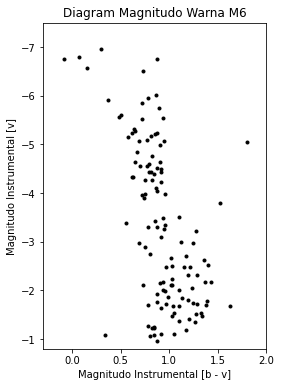

In [ ]:
#plotting data messier 6
plt.figure(figsize=(4,6))
plt.plot(cmd1['b-v'],cmd1['magv'],'k.')
plt.title("Diagram Magnitudo Warna M6")
plt.xlabel("Magnitudo Instrumental [b - v]")
plt.ylabel("Magnitudo Instrumental [v]")
plt.ylim(-0.8,-7.5)
plt.xlim(-0.3,2)
plt.show()

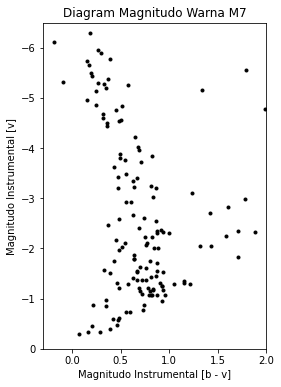

In [ ]:
#plotting data messier 7
plt.figure(figsize=(4,6))
plt.plot(cmd2['b-v'],cmd2['magv'],'k.')
plt.title("Diagram Magnitudo Warna M7")
plt.xlabel("Magnitudo Instrumental [b - v]")
plt.ylabel("Magnitudo Instrumental [v]")
plt.xlim(-0.3,2.0)
plt.ylim(0,-6.5)
plt.show()